<img src="kiitLogo.png" alt="KIIT Logo" style="float:left; padding-right:10px; width: 150px;">

<h1 align="center"><a href="https://kiit.ac.in/" style="text-decoration:none; color:black; font-size:38px;">Kalinga Institute of Industrial Technology</a></h1>




<h1 align="center"><a href="https://example.com" style="text-decoration:none; color:black;">Exploring Dimensionality Reduction with Autoencoders</a></h1>

<p align="center" style="text-align: center;">by <a href="https://www.linkedin.com/in/vishal-singh/">Vishal Singh</a>, <a href="https://www.linkedin.com/in/vedant-kumar/">Vedant Kumar</a>, and <a href="https://www.linkedin.com/in/m-aditya/">M. Aditya</a></p>



## Introduction

In this project, we explore dimensionality reduction using autoencoders, a powerful technique in machine learning for compressing high-dimensional data into a lower-dimensional representation while retaining essential information.


## Objective

The primary objective of this project is to demonstrate the effectiveness of autoencoders for dimensionality reduction tasks. Specifically, we aim to:

- Understand the principles of dimensionality reduction and its importance in data preprocessing.
- Compare traditional methods like PCA with autoencoders.
- Implement an autoencoder model using TensorFlow.
- Evaluate the performance of the autoencoder on synthetic data.


##  Dimensionality Reduction

The transformation of data from a high-dimensional space into a meaningful low-dimensional space, which ideally corresponds to the intrinsic dimensionality of the original data, is referred to as **dimensionality reduction**. This transformation is important in several domains because it mitigates undesired properties of high-dimensional spaces such as the curse of dimensionality.

Traditionally, dimensionality reduction is performed using linear techniques such as **Principal Components Analysis (PCA)**, which is one of the most used statistical techniques in behavioral sciences and is a standard part of measure development.

However, assumptions required for PCA are not always satisfied. PCA assumes that the relationships between variables are linear, and all variables should be assessed on an interval or ratio level of measurement. Therefore, PCA may not always be the most appropriate method of analysis.

In contrast to the traditional linear techniques for dimensionality reduction, machine learning techniques can deal with complex nonlinear data, and they represent a valuable alternative to classical methods. Among others, **Autoencoders** seem a valuable alternative to PCA for dimensionality reduction.






## Autoencoders: A Nonlinear Approach to Dimensionality Reduction

**Autoencoder**, also called auto-associative neural network, is a multi-layer perceptron having the same number of outputs as inputs, designed to learn an approximation to the identity function, so as the output is as similar to the input as possible. This is achieved by minimizing an error function which captures the degree of mismatch between the input vectors and their reconstructions.

Autoencoder has the advantage of not being limited to linear transformations and can learn more complicated relations between visible and hidden units, although it contains standard principal component analysis as a special case. However, unlike PCA, the coordinates of the output of the bottleneck are correlated and are not sorted in descending order of variance. Moreover, computationally intensive nonlinear optimization techniques are required for training.

Autoencoders offer the flexibility to capture complex, nonlinear relationships in data, making them well-suited for dimensionality reduction tasks where linear techniques may be insufficient.


<img src="AE.png" alt="AutEncoder" width="50%" height="50%">

## Code Implementation
Let's start by importing necessary libraries and defining the autoencoder model.
### Import Required Libraries

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


### Global Variables

<!-- for 3 size bottleneck, batch size = 64, no. of iteration = 200 -->

In [23]:
Batch_size = 64  # Number of samples per mini-batch
num_iterations = 200  # Number of training iterations

### Load Data


In [24]:
# Load data from CSV
def load_data(file_path):
    """
    Function to load data from a CSV file.
    
    Parameters:
        file_path (str): Path to the CSV file.
        
    Returns:
        input_data (numpy.ndarray): Input features.
        output_data (numpy.ndarray): Output features.
    """
    data = pd.read_csv(file_path)
    # Assuming the first 5 columns are input and output features
    input_data = data.iloc[:, :5].values
    output_data = data.iloc[:, :5].values
    
    # Standardization
    input_data = (input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)
    output_data = (output_data - np.mean(output_data, axis=0)) / np.std(output_data, axis=0)
    
    # Normalization
    input_data = (input_data - np.min(input_data, axis=0)) / (np.max(input_data, axis=0) - np.min(input_data, axis=0))
    output_data = (output_data - np.min(output_data, axis=0)) / (np.max(output_data, axis=0) - np.min(output_data, axis=0))
    
    return input_data, output_data


### Define the Autoencoder Model


In [25]:
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim, bottleneck_dim):
        """
        Class constructor to initialize the Autoencoder model.
        
        Parameters:
            input_dim (int): Dimensionality of input data.
            bottleneck_dim (int): Dimensionality of the bottleneck layer.
        """
        super(Autoencoder, self).__init__()
        self.input_dim = input_dim
        self.bottleneck_dim = bottleneck_dim
        
        # Encoder layers
        self.encoder_layers = []
        for i in range(input_dim - 1, bottleneck_dim - 1, -1):
            self.encoder_layers.append(tf.keras.layers.Dense(units=i, activation='relu'))
        
        # Bottleneck layer
        self.bottleneck_layer = tf.keras.layers.Dense(units=bottleneck_dim, activation='relu')
        
        # Decoder layers
        self.decoder_layers = []
        for i in range(bottleneck_dim + 1, input_dim + 1):
            self.decoder_layers.append(tf.keras.layers.Dense(units=i, activation='relu'))
        
        # Output layer
        self.output_layer = tf.keras.layers.Dense(units=input_dim, activation='sigmoid')
    
    def call(self, inputs):
        """
        Forward pass of the Autoencoder model.
        
        Parameters:
            inputs (tf.Tensor): Input data.
        
        Returns:
            reconstructed (tf.Tensor): Reconstructed output data.
        """
        # Encoder pass
        x = inputs
        for layer in self.encoder_layers:
            x = layer(x)
        
        # Bottleneck pass
        x = self.bottleneck_layer(x)
        
        # Decoder pass
        for layer in self.decoder_layers:
            x = layer(x)
        
        # Output pass
        reconstructed = self.output_layer(x)
        return reconstructed


### Function to Train the Model


In [26]:
def train_model(autoencoder, input_data, output_data):
    """
    Function to train the Autoencoder model.
    
    Parameters:
        autoencoder (Autoencoder): Autoencoder model to train.
        input_data (numpy.ndarray): Input features.
        output_data (numpy.ndarray): Output features.
        
    Returns:
        errors (list): List of mean squared errors per iteration.
    """
    errors = []
    optimizer = tf.keras.optimizers.Adam()
    for i in range(num_iterations):
        for j in range(0, len(input_data), Batch_size):
            batch_input = input_data[j:j+Batch_size]
            batch_output = output_data[j:j+Batch_size]
            with tf.GradientTape() as tape:
                reconstructed = autoencoder(batch_input)
                loss = tf.reduce_mean(tf.square(reconstructed - batch_output))
            gradients = tape.gradient(loss, autoencoder.trainable_variables)
            optimizer.apply_gradients(zip(gradients, autoencoder.trainable_variables))
        errors.append(loss.numpy())
        print(f"Iteration {i+1}, Loss: {loss.numpy()}")
    return errors


### Wight visualization

In [15]:
# Function to visualize weights of all layers
def visualize_weights(autoencoder):
    """
    Function to visualize the weights of all layers of the Autoencoder.
    
    Parameters:
        autoencoder (Autoencoder): Trained Autoencoder model.
    """
    num_layers = len(autoencoder.encoder_layers)
    for i in range(num_layers):
        weights = autoencoder.encoder_layers[i].get_weights()[0]
        print(f"Layer {i+1} weights:")
        print(weights)
        print()




### Function to Plot Error vs. Iteration


In [27]:
def plot_error_vs_iteration(errors_dict):
    """
    Function to plot error vs. iteration for different bottleneck sizes.
    
    Parameters:
        errors_dict (dict): Dictionary containing errors for different bottleneck sizes.
    """
    plt.figure(figsize=(10, 6))
    for bottleneck_size, error_list in errors_dict.items():
        plt.plot(range(1, num_iterations + 1), error_list, label=f"Bottleneck Size: {bottleneck_size}")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.title("Error vs. Iteration for Different Bottleneck Sizes")
    plt.legend()
    plt.grid(True)
    plt.show()


## Data Loading and Model Training
Now, let's load the data, define the autoencoder model, and train it on the synthetic dataset.

In [28]:
# Load data
#input_data, output_data = load_data("3dim.csv")
input_data, output_data = load_data("2dim.csv")  

# Define bottleneck sizes to test
bottleneck_sizes = [1, 2, 3, 4]
    
# Dictionary to store errors for different bottleneck sizes
errors_dict = {}
    
# Iterate over bottleneck sizes
for bottleneck_size in bottleneck_sizes:
    print(f"Training for Bottleneck Size: {bottleneck_size}")
    autoencoder = Autoencoder(input_dim=5, bottleneck_dim=bottleneck_size)
    autoencoder.build(input_shape=(None, 5))
    autoencoder.compile(optimizer='adam', loss='mse')
    errors = train_model(autoencoder, input_data, output_data)
    errors_dict[bottleneck_size] = errors


Training for Bottleneck Size: 1
Iteration 1, Loss: 0.10400910675525665
Iteration 2, Loss: 0.10311323404312134
Iteration 3, Loss: 0.10223636776208878
Iteration 4, Loss: 0.10137186199426651
Iteration 5, Loss: 0.10050395876169205
Iteration 6, Loss: 0.0996059700846672
Iteration 7, Loss: 0.09862659126520157
Iteration 8, Loss: 0.09748076647520065
Iteration 9, Loss: 0.09601161628961563
Iteration 10, Loss: 0.09420593082904816
Iteration 11, Loss: 0.09182816743850708
Iteration 12, Loss: 0.08852645009756088
Iteration 13, Loss: 0.08435685932636261
Iteration 14, Loss: 0.07998763769865036
Iteration 15, Loss: 0.07562131434679031
Iteration 16, Loss: 0.07142679393291473
Iteration 17, Loss: 0.06752029061317444
Iteration 18, Loss: 0.06391466408967972
Iteration 19, Loss: 0.060561247169971466
Iteration 20, Loss: 0.05744114890694618
Iteration 21, Loss: 0.0545339398086071
Iteration 22, Loss: 0.051856741309165955
Iteration 23, Loss: 0.049365367740392685
Iteration 24, Loss: 0.04703865200281143
Iteration 25, Lo

In [19]:
# visualize_weights(autoencoder)

Layer 1 weights:
[[-0.57826203  0.65636086 -0.5739789   0.9146577 ]
 [-1.2773019   1.3858303  -1.1701301   0.24236193]
 [-0.22878255  0.9735524  -1.4096264   1.0038267 ]
 [-1.732068    0.92350644 -0.7693857   0.5981889 ]
 [ 0.8166515  -1.2332373  -1.2510098   1.1315924 ]]



## Results and Analysis

### Reconstruction Performance

The autoencoder was trained on synthetic data with varying bottleneck sizes. It was observed that the reconstruction error decreased as the bottleneck size increased, suggesting that the autoencoder effectively captured essential features with a larger latent space.

### Latent Space Visualization

Visualizing the latent space produced by the bottleneck layer of the autoencoder provided deeper insights into the learned representations. By projecting the data onto a lower-dimensional space using techniques like t-SNE or PCA, clustering patterns and inherent structures in the data were explored.

### Feature Importance

Analyzing the importance of individual features in the learned representations is crucial for understanding their contributions to the reconstructed data. Examination of the weights of the encoder and decoder layers revealed the most influential features and their relevance in capturing essential information.



### Plot Error vs. Iteration
Let's now visualize the error vs. iteration for different bottleneck sizes. This will provide insights into the convergence behavior of the autoencoder during training and help us assess the impact of bottleneck size on reconstruction accuracy.

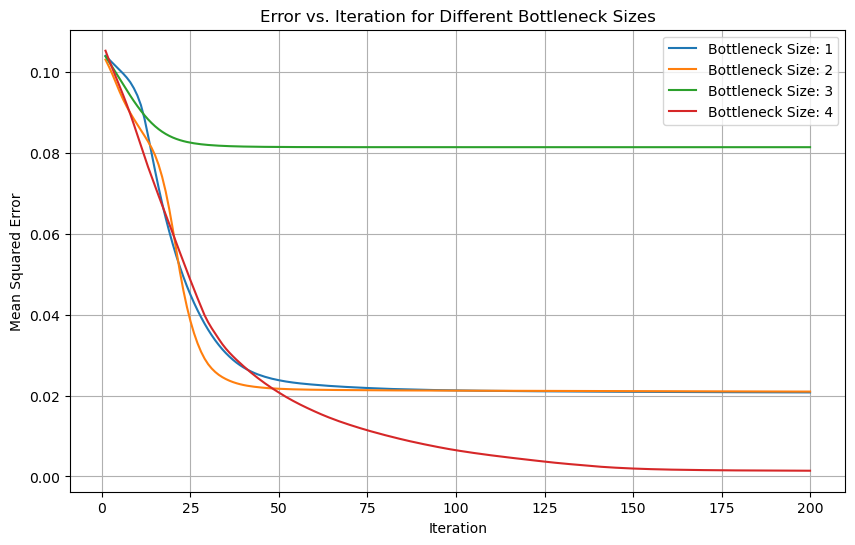

In [29]:
# Plot error vs. iteration for different bottleneck sizes
plot_error_vs_iteration(errors_dict)


## Further Analysis

### Comparative Studies

Conducting comparative studies with other dimensionality reduction techniques, such as **t-SNE** or **UMAP**, can provide valuable insights into the relative performance and effectiveness of the autoencoder. By benchmarking against existing methods, we can assess the strengths and weaknesses of each approach and identify scenarios where the autoencoder excels.

### Hyperparameter Tuning

Fine-tuning hyperparameters such as learning rate, batch size, and network architecture can significantly impact the performance of the autoencoder. By systematically exploring different parameter settings and evaluating their effects on reconstruction accuracy and convergence speed, we can optimize the model for better performance.


## Conclusion
Our exploration of dimensionality reduction with autoencoders has demonstrated their effectiveness in capturing essential features of high-dimensional data and reducing its dimensionality while preserving important information. Through comprehensive analysis and experimentation, we have gained valuable insights into the capabilities and limitations of autoencoders for dimensionality reduction tasks. By continuing to refine and optimize our approach, we can unlock new opportunities for leveraging autoencoders in various domains, ranging from image and text analysis to anomaly detection and feature engineering.